<a href="https://colab.research.google.com/github/rickycarrillo3/ML-Projects/blob/main/Logistic_Regression2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello once again. Last time, we dealt with linear regressor, i.e, finding the line of best fit through a given dataset. Now, we move on to another task: Classification. In this demo, we will go through all the steps to train a linear classifier for two classes.

A linear classifier is nothing more than a line in 2D such that the points above the line are considered to be in one class, and those below the line are considered to be in the other class. In higher dimensions, linear classifiers take the form of hyperplanes.

Mathematically, hyperplanes take the form $c_1x_1 + c_2x_2 + c_3x_3 + ... + c_{n}x_{n} = a$ in $n$ dimensions, where the $c_i$ and $a$ are constants and the $x_i$ are our variables. Notice that in 2 dimensions, this reduces to $c_1x_1 + c_2x_2 = a$, which we can see is our familiar equation of a line.

**2 Dimensional linear Classifier**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

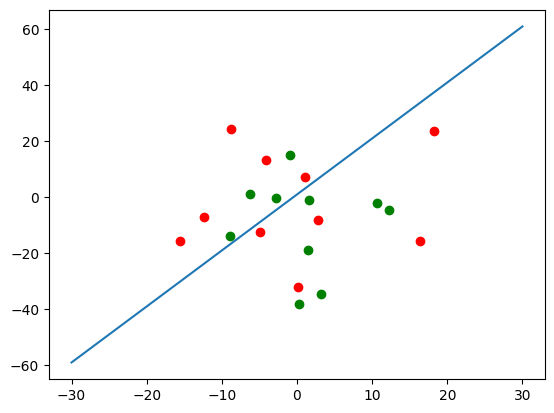

In [ ]:
w = 2
b = 1
# Plot the decision boundary (The line)
X = np.linspace(-30, 30)
Y = w*X + b
plt.plot(X, Y)
# Create random dataset
X_values = np.random.randn(20) * 10
Y_values = np.random.randn(20) * 15
labels = np.array([i % 2 for i in range(20)])
# Class 0
plt.scatter([X_values[i] for i in range(20) if labels[i] == 0] ,[Y_values[i] for i in range(20) if labels[i] == 0], color='red')
# Class 1
plt.scatter([X_values[i] for i in range(20) if labels[i] == 1] ,[Y_values[i] for i in range(20) if labels[i] == 1], color='green')

In [ ]:
## Accuracy Computation ##

def compute_accuracy(X, labels, w, b):
  correct_predictions = 0
  for i in range(len(labels)):
    label = labels[i]
    x,y = X[i]
    prediction = y - (w * x + b) > 0
    if prediction == label:
      correct_predictions += 1
  return correct_predictions / len(labels)

X = np.array([(X_values[i], Y_values[i]) for i in range(len(X_values))])
print(f"Accuracy: {compute_accuracy(X, labels, w, b)}")


Accuracy: 0.45


Feel free to play around adjusting $w$ and $b$. This classifier is quite bad, but also the data is not very separable into two groups. This is a good point to think about: when is a linear classifier approriate for our data? Anyhow, we trained a linear regressor, can we train a linear classifier now?

The answer is yes! In addition, we can even use a very similar strategy. We will make use gradient descent once again; however, we will use a different loss function, and we will introduce a new function: the sigmoid.

The sigmoid, often denoted $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the function we will look at today.


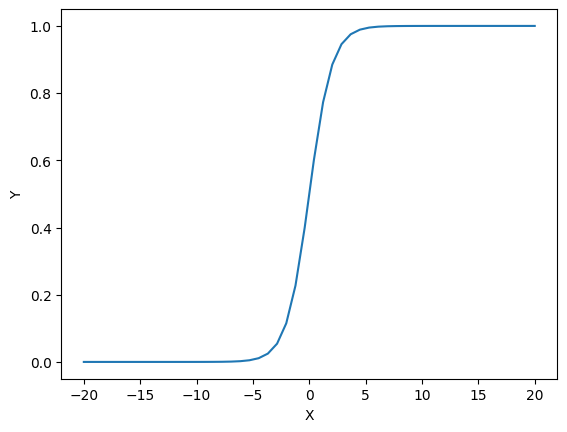

In [ ]:
### Visualization of the Sigmoid ###
X = np.linspace(-20,20)
Y = 1 / (1 + np.exp(-X))
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


def compute_sigmoid(z):
  return 1 / (1 + np.exp(-z))

Why do we use the sigmoid? Well, it turns the input $z$ into a probability between $0$ and $1$, which is quite nice as we can set a threshold in order finalize our classification task. In addition, it is everywhere differentiable and its derivative is quite simple to compute, so running gradient descent is quite easy.

However, how exactly will be use this function if our input has two variables $x$ and $y$? We will let $z = w_1x_1 + w_2x_2 + b$ where the $w_i$ are our weights and $b$ is our bias term. Then, our sigmoid will look like

$\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

It might look scary at first, but let's try to understand what is happening. Usually, the threshold is set to $0.5$, anything above is of class $1$ and anything below is of class $0$, so let's plug that in:

$0.5 = \frac{1}{1 + e^{-z}} \iff e^{-z} = 1 \iff z = 0$

Notice that if we want $\sigma(z) > 0.5$, we must have the denominator be less than what it is at the moment, so setting $z > 0$ would give us a smaller $e^{-z}$. Thus, our classification is determined by the sign of $z = w_1x_1 + w_2x_2 + b$. Thus, this line is called the **decision boundary**. In essence, by finding the best sigmoid for our dataset, we are trying to find an optimal decision boundary.

Now, as with all optimization problems, we need something to optimize. Remember, we want a loss function that penalizes wrong classifications. The most widely used loss function for classification problem is the Negative Log-Likelihood, given by

$NLL = -\sum_{i = 1}^{n} y^{(i)}(\log(\hat{y}^{(i)})) + (1 - y^{(i)})(\log(1 - \hat{y}^{(i)}))$

where $y^{(i)}$ is the ith label, $n$ is the number of datapoints, and $\hat{y}^{(i)}$ is the predicted probability that the ith datapoint/example is in class $1$.

Let us look at an example with a single datapoint. Suppose this datapoint is of class $1$ (since we only have two classes, they are denoted class $0$ and class $1$) but our prediction yields a probability of $0.1$ that this datapoint is in class $1$. Then,

$NLL = -\left[(1)(\log(0.1)) + (1 - 1)(\log(0.9))\right] = 1$

However, if the model was confident and had a probability of $0.9$ that the example was of class $1$, the $NLL$ would be $\approx 0.05$. Thus, we can see that the better the prediction, the lower the loss! Perfect.

In [ ]:
def compute_nll(predictions, labels):
  nll_total = 0
  epsilon = 1e-15 # small value to prevent log(0)
  for i in range(len(labels)):
    label = labels[i]
    prediction = predictions[i]
    nll_total += label * math.log(prediction + epsilon) + (1 - label) * math.log(1 - prediction + epsilon)

  return -nll_total

### Example ###
example_predictions = [0.2, 0.4, 0.5, 0.2, 0.6]
example_labels = [1,0,1,1,0]
print(f"Negative Log-Likelihood: {compute_nll(example_predictions, example_labels)}")

Negative Log-Likelihood: 5.339139361068275


Now, we have all we need to run gradient descent and optimize our linear Classifier. We will do so with two datasets: a clearly separable one, and a randomly generated dataset (Most likely not separable) By separable, we mean a dataset where the data can be easily "separated" into two or more classes.

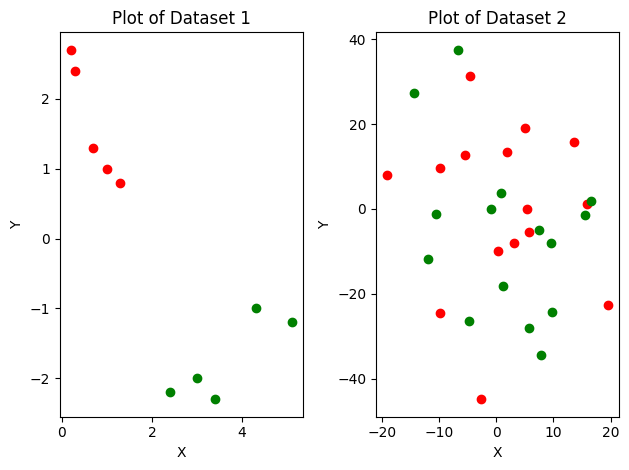

In [ ]:
### Dataset 1 ###
X1 = [1, 0.7, 0.3, 0.2, 1.3, 3, 4.3, 5.1, 3.4, 2.4]
Y1 = [1, 1.3, 2.4, 2.7, 0.8, -2, -1, -1.2, -2.3, -2.2, -1.2]
labels1 = [0,0,0,0,0,1,1,1,1,1]
figure, axis = plt.subplots(1, 2)
### Visualize the first dataset
# Class 0
axis[0].scatter([X1[i] for i in range(len(X1)) if labels1[i] == 0] ,[Y1[i] for i in range(len(X1)) if labels1[i] == 0], color='red')
# Class 1
axis[0].scatter([X1[i] for i in range(len(X1)) if labels1[i] == 1] ,[Y1[i] for i in range(len(X1)) if labels1[i] == 1], color='green')
axis[0].set_title('Plot of Dataset 1')
axis[0].set_xlabel('X')
axis[0].set_ylabel('Y')

### Dataset 2 ###
X2 = np.random.randn(30) * 10
Y2 = np.random.randn(30) * 20
labels2 = [i % 2 for i in range(30)]
### Visualize the second dataset
# Class 0
axis[1].scatter([X2[i] for i in range(len(X2)) if labels2[i] == 0] ,[Y2[i] for i in range(len(X2)) if labels2[i] == 0], color='red')
# Class 1
axis[1].scatter([X2[i] for i in range(len(X2)) if labels2[i] == 1] ,[Y2[i] for i in range(len(X2)) if labels2[i] == 1], color='green')
axis[1].set_title('Plot of Dataset 2')
axis[1].set_xlabel('X')
axis[1].set_ylabel('Y')

plt.tight_layout()

In [ ]:
### Logistic Regressor ###
class LogisticRegressor():
  def __init__(self, weights, bias):
    self.weights = [weight for weight in weights]
    self.bias = bias

  ### Getter methods ###
  def get_weights(self):
    return self.weights

  def get_bias(self):
    return self.bias

  """
  Given a single datapoint, predicts
  the probability that it belongs to class 1

  x : A single datapoint
  """
  def predict_score(self, x):
    z = 0
    for i in range(len(self.weights)):
      z += self.weights[i] * x[i]
    z += self.bias
    # Could also do
    # z = np.dot(self.weights, x) + self.bias
    return compute_sigmoid(z)

  """
  Computes the gradient of the NLL with respect to the weights
  and bias
  """
  def compute_nll_gradient(self, X, labels):
    grad = np.zeros(len(self.weights)) # List of all d/dx_i
    grad_b = 0
    for j in range(len(X)):
      x = X[j]
      label = labels[j]
      for i in range(len(x)):
        x_i = x[i]
        prediction = self.predict_score(x)
        # Update d/dw_i
        grad[i] += -label * (prediction - 1) * x_i + (1 - label) * prediction * x_i
      # Update d/db
      grad_b += -label * (prediction - 1) + (1 - label) * prediction

    return grad, grad_b

  """
  Given a labeled dataset, it trains the regressor
  to best fit the given dataset. Uses the Negative Log
  Likelihood as the loss function.
  """
  def train(self, X, labels, learning_rate=0.005, epochs=200):
    assert(len(X) == len(labels), "The number of datapoints and labels should be the same")
    n = len(X)
    for i in range(epochs):
      predictions = [self.predict_score(x) for x in X]
      grad_w, grad_b = self.compute_nll_gradient(X, labels)
      print(f"Epoch {i}: Loss = {compute_nll(predictions, labels)}")
      # Update the weights
      self.weights = [self.weights[i] - learning_rate * grad_w[i] for i in range(len(self.weights))]
      self.bias = self.bias - learning_rate * grad_b

  """
  Given a dataset, it returns the final classifcations
  into class 0 and class 1
  """
  def final_classifications(self, X):
    return [1 if self.predict_score(x) > 0.5 else 0 for x in X]

  def compute_accuracy(self, X, labels):
    correct_predictions = 0
    for i in range(len(labels)):
      label = labels[i]
      x = X[i]
      prediction = self.predict_score(x) > 0.5
      if prediction == label:
        correct_predictions += 1
    return correct_predictions / len(labels)

<>:55: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:55: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipython-input-89-2322548395.py:55: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(X) == len(labels), "The number of datapoints and labels should be the same")


Let us now see our linear classifier at work !

In [ ]:
"""
Plots the decision boundary of a 2-variable
logistic regressor
"""
def plot_decision_boundary(X, labels, classifier):
  X_line = np.linspace(min([x[0] for x in X]) - 2, max([x[0] for x in X]) + 2)
  final_weights = classifier.get_weights()
  final_bias = classifier.get_bias()
  print(f"Final weights: {final_weights}")
  print(f"Final bias: {final_bias}")
  Y = (-final_weights[0] * X_line - final_bias) / final_weights[1] # What happens if w1 is zero?
  plt.plot(X_line, Y)
  # Plot the points
  # Class 0
  plt.scatter([X[i][0] for i in range(len(X)) if labels[i] == 0] ,[X[i][1] for i in range(len(X)) if labels[i] == 0], color='red')
  # Class 1
  plt.scatter([X[i][0] for i in range(len(X)) if labels[i] == 1] ,[X[i][1] for i in range(len(X)) if labels[i] == 1], color='green')
  plt.title('Plot of Dataset')
  plt.xlabel('X1')
  plt.ylabel('X2')


Epoch 0: Loss = 6.75912958218041
Epoch 1: Loss = 6.630494389275002
Epoch 2: Loss = 6.504925636224318
Epoch 3: Loss = 6.382310180138399
Epoch 4: Loss = 6.2625422499104
Epoch 5: Loss = 6.145522865111916
Epoch 6: Loss = 6.031159293957672
Epoch 7: Loss = 5.919364549457633
Epoch 8: Loss = 5.810056922459618
Epoch 9: Loss = 5.703159549999935
Epoch 10: Loss = 5.598600017194714
Epoch 11: Loss = 5.496309990797412
Epoch 12: Loss = 5.396224882500146
Epoch 13: Loss = 5.298283540052965
Epoch 14: Loss = 5.202427964304866
Epoch 15: Loss = 5.108603050323504
Epoch 16: Loss = 5.016756350820645
Epoch 17: Loss = 4.926837860191454
Epoch 18: Loss = 4.838799817563697
Epoch 19: Loss = 4.752596527344693
Epoch 20: Loss = 4.668184195846701
Epoch 21: Loss = 4.5855207826637425
Epoch 22: Loss = 4.504565865563324
Epoch 23: Loss = 4.425280517743939
Epoch 24: Loss = 4.3476271963934385
Epoch 25: Loss = 4.271569641563143
Epoch 26: Loss = 4.197072784448644
Epoch 27: Loss = 4.124102664239583
Epoch 28: Loss = 4.052626352767

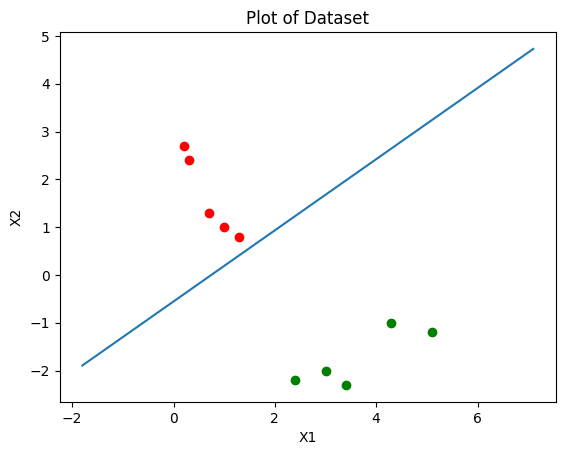

In [ ]:
### Separable Dataset example ###
initial_weights1 = [3, -1] # Feel free to adjust
initial_bias1 = 0

separable_classifier = LogisticRegressor(initial_weights1, initial_bias1)
dataset_1 = [[x, y] for x,y in zip(X1,Y1)]
# Train #
separable_classifier.train(dataset_1, labels1)
# Results #
print(f"Accuracy: {separable_classifier.compute_accuracy(dataset_1, labels1)}")
# Plot the decision boundary (The line)
plot_decision_boundary(dataset_1, labels1, separable_classifier)

Epoch 0: Loss = 223.28950194762294
Epoch 1: Loss = 223.06698302778224
Epoch 2: Loss = 222.8458163674542
Epoch 3: Loss = 222.62601951688848
Epoch 4: Loss = 222.40760663090873
Epoch 5: Loss = 222.19058818080163
Epoch 6: Loss = 221.9749706412617
Epoch 7: Loss = 221.76075619923003
Epoch 8: Loss = 221.54794243874048
Epoch 9: Loss = 221.3365220307828
Epoch 10: Loss = 221.12648240023455
Epoch 11: Loss = 220.91780538409552
Epoch 12: Loss = 220.71046685828125
Epoch 13: Loss = 220.5044363456862
Epoch 14: Loss = 220.29967656952036
Epoch 15: Loss = 220.09614297229103
Epoch 16: Loss = 219.89378317077933
Epoch 17: Loss = 219.69253633046836
Epoch 18: Loss = 219.4923324860967
Epoch 19: Loss = 219.29309173429323
Epoch 20: Loss = 219.09472334668075
Epoch 21: Loss = 218.89712475570454
Epoch 22: Loss = 218.70018040864565
Epoch 23: Loss = 218.50376049083596
Epoch 24: Loss = 218.3077195030955
Epoch 25: Loss = 218.11189469586157
Epoch 26: Loss = 217.91610435038123
Epoch 27: Loss = 217.7201459374398
Epoch 28:

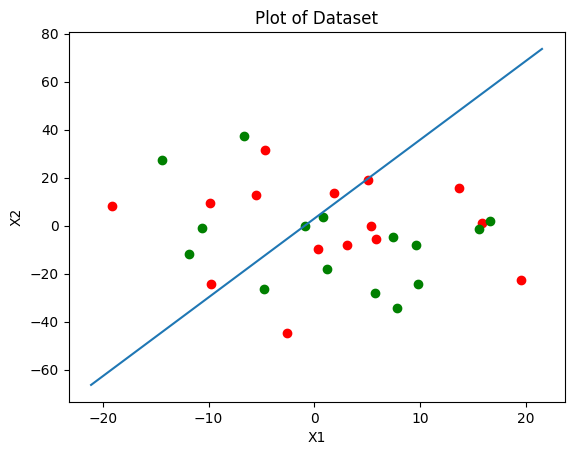

In [ ]:
### Non-separable dataset example
initial_weights1 = [1, -1] # Feel free to adjust !
initial_bias1 = 1

nonseparable_classifier = LogisticRegressor(initial_weights1, initial_bias1)
dataset_2 = [[x, y] for x,y in zip(X2,Y2)]
# Train #
nonseparable_classifier.train(dataset_2, labels2, learning_rate=0.0001)
# Results #
print(f"Accuracy: {nonseparable_classifier.compute_accuracy(dataset_2, labels2)}")
# Plot the decision boundary (The line)
plot_decision_boundary(dataset_2, labels2, nonseparable_classifier)

We can try minimizing the Negative Log Likelihood by playing with the learning rate. In the case above, a learning_rate that is too large could make the error grow quite large due to the dependence of the gradient on the datapoints.

**Thanks for participating in this demo !**

Next, we will talk about some other approaches for classification tasks